<a href="https://colab.research.google.com/github/Lucas-Buk/Introducao-Ciencia-de-Dados/blob/master/Trabalho_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intalações e importações das bibliotecas


In [ ]:
!pip install gitly

In [2]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='colab')

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np

# Leitura dos dados

In [4]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_sellers_dataset.csv')

In [5]:
df_clientes.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [6]:
df_geo.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [7]:
df_compra_itens.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [8]:
df_compra_pagamentos.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [9]:
df_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [10]:
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [11]:
df_produtos.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [12]:
df_vendedores.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


# Análises a serem realizadas

1.   Maiores compradores em $ (5 que mais gastam)
2.   Tempo médio de entrega por região
3.   Formas de pagamento mais comuns por região
4.   Categorias mais bem avaliadas (5+)



Serão realizadas as 4 análises propostas no T1 tanto no PowerBI quanto em python.

# Análise 1 - 5 consumidores que mais gastaram em compras, com as respectivas cidades e dados de cada pedido.


## Tratamento dos dados

### Criação da coluna com o valor total da compra

In [13]:
df_compra_itens['valor_final'] = df_compra_itens.order_item_id * df_compra_itens.price
df_compra_itens.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9


### Join das tabelas

In [14]:
df_left = df_compras[['order_id', 'customer_id', 'order_purchase_timestamp']]
df_left.head(3)

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49


In [15]:
df_right = df_compra_itens[['order_id','product_id', 'valor_final', 'seller_id', 'freight_value']]
df_right.head(3)

,order_id,product_id,valor_final,seller_id,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,48436dade18ac8b2bce089ec2a041202,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.9,dd7ddc04e1b6c2c614352b383efe2d36,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.0,5b51032eddd242adc84c38acab88f23d,17.87


In [16]:
df_res = df_left.merge(df_right, how='right', on='order_id')
df_res.head(3)

,order_id,customer_id,order_purchase_timestamp,product_id,valor_final,seller_id,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,4244733e06e7ecb4970a6e2683c13e61,58.9,48436dade18ac8b2bce089ec2a041202,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,e5f2d52b802189ee658865ca93d83a8f,239.9,dd7ddc04e1b6c2c614352b383efe2d36,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,c777355d18b72b67abbeef9df44fd0fd,199.0,5b51032eddd242adc84c38acab88f23d,17.87


In [17]:
df_res.shape

(112650, 7)

In [18]:
df_right = df_clientes[['customer_id', 'customer_state', 'customer_city']]
df_right.head(3)

,customer_id,customer_state,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,franca
1,18955e83d337fd6b2def6b18a428ac77,SP,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,SP,sao paulo


In [19]:
df_info = df_res.merge(df_right, how='left', on='customer_id')
df_info.head(3)

,order_id,customer_id,order_purchase_timestamp,product_id,valor_final,seller_id,freight_value,customer_state,customer_city
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,4244733e06e7ecb4970a6e2683c13e61,58.9,48436dade18ac8b2bce089ec2a041202,13.29,RJ,campos dos goytacazes
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,e5f2d52b802189ee658865ca93d83a8f,239.9,dd7ddc04e1b6c2c614352b383efe2d36,19.93,SP,santa fe do sul
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,c777355d18b72b67abbeef9df44fd0fd,199.0,5b51032eddd242adc84c38acab88f23d,17.87,MG,para de minas


In [20]:
df_info.shape

(112650, 9)

In [21]:
df_right = df_produtos[['product_id', 'product_category_name']]
df_right.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [22]:
df_maiores_compradores_merge = df_info.merge(df_right, how='left', on='product_id')
df_maiores_compradores_merge.head(3)

,order_id,customer_id,order_purchase_timestamp,product_id,valor_final,seller_id,freight_value,customer_state,customer_city,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,4244733e06e7ecb4970a6e2683c13e61,58.9,48436dade18ac8b2bce089ec2a041202,13.29,RJ,campos dos goytacazes,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,e5f2d52b802189ee658865ca93d83a8f,239.9,dd7ddc04e1b6c2c614352b383efe2d36,19.93,SP,santa fe do sul,pet_shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,c777355d18b72b67abbeef9df44fd0fd,199.0,5b51032eddd242adc84c38acab88f23d,17.87,MG,para de minas,moveis_decoracao


In [23]:
df_maiores_compradores_merge.shape

(112650, 10)

## Análise descritiva

In [24]:
df_maiores_compradores = df_maiores_compradores_merge[['customer_id', 'valor_final']].groupby(by='customer_id').sum()
df_maiores_compradores = df_maiores_compradores.sort_values(by = 'valor_final', ascending=False)
df_maiores_compradores.head(5)

,valor_final
customer_id,
1617b1357756262bfa56ab541c47bc16,60480.0
be1b70680b9f9694d8c70f41fa3dc92b,21000.0
05455dfa7cd02f13d132aa7a6a9729c6,20771.1
bd5d39761aa56689a265d95d8d32b8be,20727.0
ec5b2ba62e574342386871631fafd3fc,17900.0


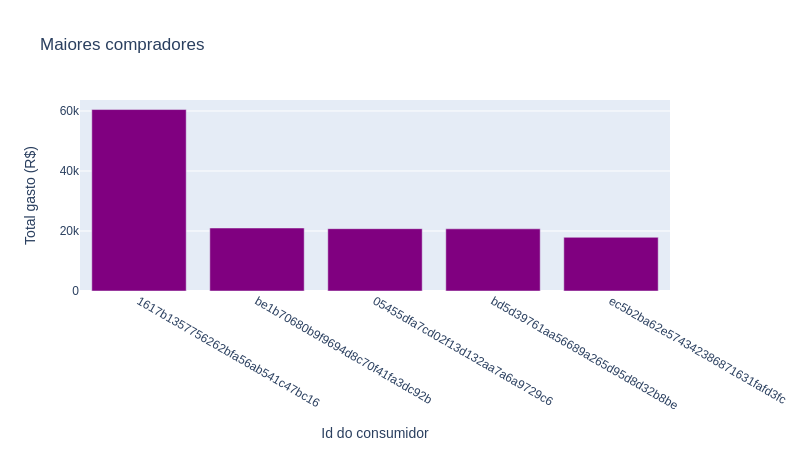

In [25]:
fig = px.bar(df_maiores_compradores.head(5), y = 'valor_final', title='Maiores compradores', 
             color_discrete_sequence =['purple']*5,
             labels={'valor_final':'Total gasto (R$)','customer_id':'Id do consumidor'})
gitly.show(fig)

## Informações sobre os compradores


In [26]:
# Somente digitar a posição para saber as informações
pos = 1

ordem = ['customer_id', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp', 'seller_id', 'product_id',  'product_category_name', 'valor_final', 'freight_value']
df_info = df_maiores_compradores_merge[df_maiores_compradores_merge.customer_id == df_maiores_compradores.index[pos - 1]]
print(f'Compras do cliente na {pos}ª posição de gastos')
df_info[ordem]

Compras do cliente na 1ª posição de gastos


,customer_id,customer_city,customer_state,order_id,order_purchase_timestamp,seller_id,product_id,product_category_name,valor_final,freight_value
1647,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,1680.0,28.01
1648,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,3360.0,28.01
1649,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,5040.0,28.01
1650,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,6720.0,28.01
1651,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,8400.0,28.01
1652,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,10080.0,28.01
1653,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,11760.0,28.01
1654,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,13440.0,28.01


Os maiores compradores tem a característica de terem feito as compras todas no mesmo dia e com os mesmos produtos, a diferença está no valor final da compra.


# Análise 2 - Tempo médio de entrega por estado do cliente


## Tratamento dos dados

### Datas para formato datetime



In [27]:
df_compras.agg(['nunique', 'count', 'size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99281,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [28]:
df_compras.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [29]:
df_compras_dt = df_compras[['order_id', 'customer_id', 'order_status']].copy()
df_compras_dt.head(2)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered


In [30]:
lista_colunas_datas = list(df_compras.iloc[:1, 3:].columns)
lista_colunas_datas

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [31]:
for coluna in lista_colunas_datas:
    df_compras_dt[coluna] = pd.to_datetime(df_compras[coluna], format='%Y-%m-%d')

df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [32]:
df_compras_dt.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Complemento das colunas de datas que possuem informação NaN

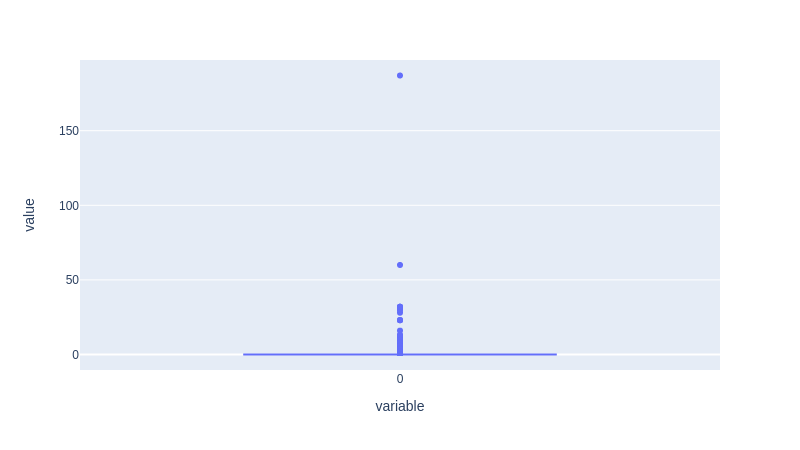

In [33]:
# Verificação da distribuição de valores, para decisão entre substituição por média ou mediana
compra_confirm = (df_compras_dt.order_approved_at - df_compras_dt.order_purchase_timestamp).round('S')
fig = px.box(compra_confirm.dt.days)
gitly.show(fig)

In [34]:
mediana_compra_confirm = compra_confirm.median()
mediana_compra_confirm

Timedelta('0 days 00:20:36')

In [35]:
df_compras_dt.order_approved_at.fillna(value=df_compras_dt.order_purchase_timestamp + mediana_compra_confirm, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,81018,95664,459
count,99441,99441,99441,99441,99441,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


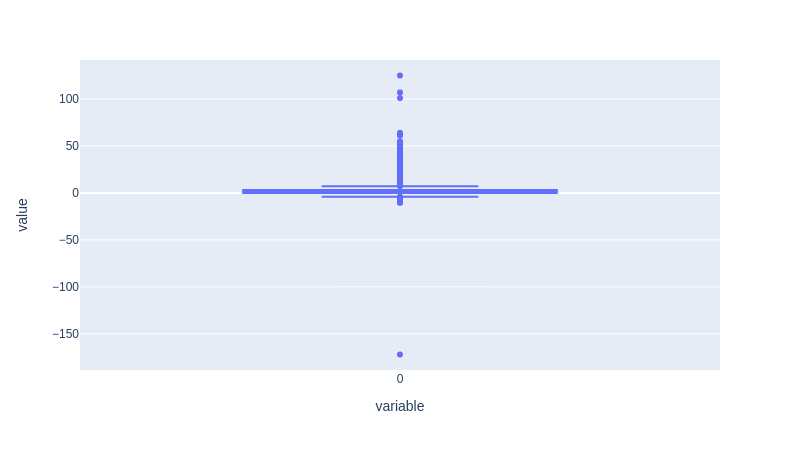

In [36]:
# Verificação da distribuição de valores, para decisão entre substituição por média ou mediana
aprov_transp = (df_compras_dt.order_delivered_carrier_date - df_compras_dt.order_approved_at).round('S')
fig = px.box(aprov_transp.dt.days)
gitly.show(fig)

In [37]:
mediana_aprov_transp = aprov_transp.median().round('S')
mediana_aprov_transp

Timedelta('1 days 19:39:24')

In [38]:
df_compras_dt.order_delivered_carrier_date.fillna(value=df_compras_dt.order_approved_at + mediana_aprov_transp, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,82793,95664,459
count,99441,99441,99441,99441,99441,99441,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


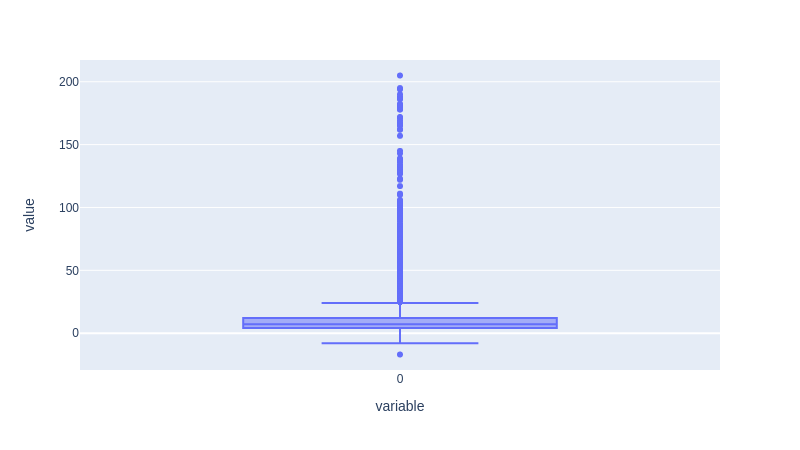

In [39]:
transp_deliv = (df_compras_dt.order_delivered_customer_date - df_compras_dt.order_delivered_carrier_date).round('S')
fig = px.box(transp_deliv.dt.days)
gitly.show(fig)

In [40]:
mediana_transp_deliv = transp_deliv.median()#.round('S')
mediana_transp_deliv

Timedelta('7 days 02:23:40')

In [41]:
df_compras_dt.order_delivered_customer_date.fillna(value=df_compras_dt.order_delivered_carrier_date + mediana_transp_deliv, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,82793,98603,459
count,99441,99441,99441,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


Todas as colunas das datas foram preenchidas com as medianas de tempo entre as etapas, para não perder informações e diminuir a influência de outliers.




### Criação da coluna com o intervalo de dias para entrega

In [42]:
df_compras_dt['delivery_interval'] = df_compras_dt.order_delivered_customer_date - df_compras_dt.order_purchase_timestamp
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40


In [43]:
df_compras_dt['days_delivery_interval'] = df_compras_dt.delivery_interval.dt.days
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,9


### Join das tabelas



In [44]:
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,9


In [45]:
df_compras_dt.agg(['nunique', 'count', 'size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,days_delivery_interval
nunique,99441,99441,8,98875,90893,82793,98603,459,96085,147
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441


In [46]:
df_left = df_compras_dt[['customer_id', 'days_delivery_interval']]
df_left.head(2)

,customer_id,days_delivery_interval
0,9ef432eb6251297304e76186b10a928d,8
1,b0830fb4747a6c6d20dea0b8c802d7ef,13


In [47]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [48]:
df_compras_dt.agg(['nunique', 'count', 'size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,days_delivery_interval
nunique,99441,99441,8,98875,90893,82793,98603,459,96085,147
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441


In [49]:
df_right = df_clientes[['customer_id', 'customer_state']]
df_right.head(2)

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP


In [50]:
df_res = df_left.merge(df_right, how='left', on='customer_id')
df_res.head(3)

,customer_id,days_delivery_interval,customer_state
0,9ef432eb6251297304e76186b10a928d,8,SP
1,b0830fb4747a6c6d20dea0b8c802d7ef,13,BA
2,41ce2a54c0b03bf3443c3d931a367089,9,GO


In [51]:
df_res.shape

(99441, 3)

## Análise descritiva

In [52]:
# Mediana
df_mediana_entrega = df_res[['days_delivery_interval', 'customer_state']].groupby(by='customer_state').median()
df_mediana_entrega = df_mediana_entrega.sort_values(by = 'days_delivery_interval', ascending=False)
df_mediana_entrega.head(5)

,days_delivery_interval
customer_state,
AM,25.0
AP,24.0
RR,23.5
AL,21.0
PA,20.0


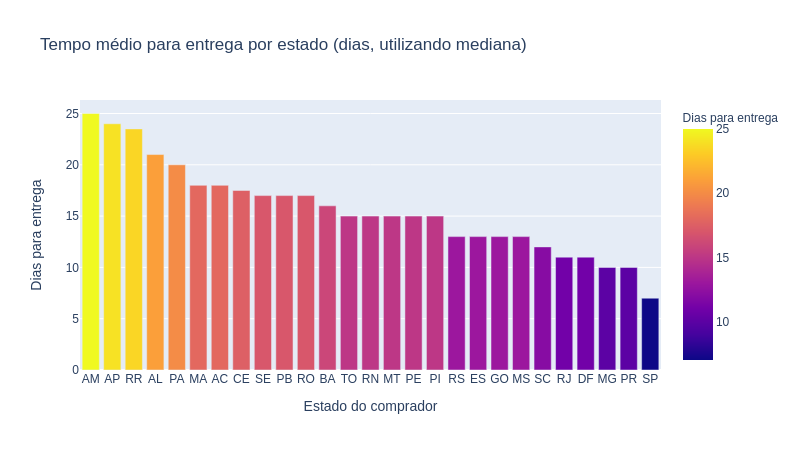

In [53]:
fig = px.bar(df_mediana_entrega, y = 'days_delivery_interval', title='Tempo médio para entrega por estado (dias, utilizando mediana)', 
             color = 'days_delivery_interval',
             labels={'customer_state':'Estado do comprador','days_delivery_interval':'Dias para entrega'})
gitly.show(fig)

In [54]:
# Média
df_media_entrega = df_res[['days_delivery_interval', 'customer_state']].groupby(by='customer_state').mean()
df_media_entrega = df_media_entrega.sort_values(by = 'days_delivery_interval', ascending=False)
df_media_entrega.head(5)

,days_delivery_interval
customer_state,
RR,27.695652
AP,26.470588
AM,25.635135
AL,23.462470
PA,22.916923


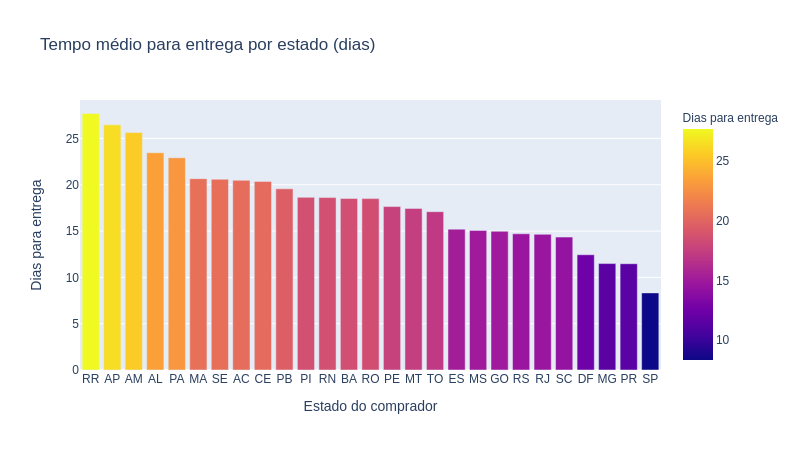

In [55]:
fig = px.bar(df_media_entrega, y = 'days_delivery_interval', title='Tempo médio para entrega por estado (dias)', 
             color = 'days_delivery_interval',
             labels={'customer_state':'Estado do comprador','days_delivery_interval':'Dias para entrega'})
gitly.show(fig)

Tendo em vista a análise utilizando a média e a mediana, não oberva-se muita alteração entre os valores, mas mesmo assim, provavelmente a melhor forma seja com a mediana, por sofrer menos a influência de possíveis outliers, retratando melhor quanto tempo demora para receber o pedido a partir do momento da compra, da mesma forma que foi utilizado na substituição dos valores faltantes.


# Análise 3 - Formas de pagamento mais recorrentes por região do vendedor.


## Tratamento dos dados

In [56]:
df_compra_pagamentos.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [57]:
df_compra_pagamentos.agg(['nunique', 'count', 'size'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
nunique,99440,29,5,24,29077
count,103886,103886,103886,103886,103886
size,103886,103886,103886,103886,103886


### Deixando somente order_id únicos

In [58]:
df_compra_pagamentos.order_id.value_counts(ascending=False).head(5)

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
ee9ca989fc93ba09a6eddc250ce01742    19
Name: order_id, dtype: int64

In [59]:
df_compra_pagamentos[df_compra_pagamentos.order_id == 'fa65dad1b0e818e3ccc5cb0e39231352']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [60]:
df_res = df_compra_pagamentos.drop_duplicates(subset=['order_id'])
df_res.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [61]:
df_res.shape

(99440, 5)

### Join das tabelas

In [62]:
df_left = df_res[['order_id', 'payment_type']]
df_left.head(3)

,order_id,payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card


In [63]:
df_compra_itens.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9


In [64]:
df_compra_itens.agg(['nunique', 'count', 'size'])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
nunique,98666,21,32951,3095,93318,5968,6999,8050
count,112650,112650,112650,112650,112650,112650,112650,112650
size,112650,112650,112650,112650,112650,112650,112650,112650


In [65]:
df_right = df_compra_itens[['order_id', 'seller_id']]
df_right.head(3)

,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d


In [66]:
df_res = df_left.merge(df_right, how='left', on='order_id')
df_res.head(3)

,order_id,payment_type,seller_id
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,213b25e6f54661939f11710a6fddb871
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,eaf6d55068dea77334e8477d3878d89e
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,cc419e0650a3c5ba77189a1882b7556a


### Retirando order_id duplicados

In [67]:
df_res.order_id.value_counts(ascending=False).head(4)

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
428a2f660dc84138d969ccd69a0ab6d5    15
Name: order_id, dtype: int64

In [68]:
df_res[df_res.order_id == '1b15974a0141d54e36626dca3fdc731a']

,order_id,payment_type,seller_id
33897,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33898,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33899,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33900,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33901,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33902,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33903,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33904,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33905,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba
33906,1b15974a0141d54e36626dca3fdc731a,boleto,8e6d7754bc7e0f22c96d255ebda59eba


In [69]:
df_res.drop_duplicates(subset=['order_id'], inplace=True)
df_res.head(2)

,order_id,payment_type,seller_id
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,213b25e6f54661939f11710a6fddb871
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,eaf6d55068dea77334e8477d3878d89e


In [70]:
df_res.shape

(99440, 3)

### Join com a tabela vendedores

In [71]:
df_vendedores.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [72]:
df_right = df_vendedores[['seller_id', 'seller_state']]
df_right.head(3)

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ


In [73]:
df_vendedores_compra_itens = df_res.merge(df_right, how='left', on='seller_id')
df_vendedores_compra_itens.head(3)

,order_id,payment_type,seller_id,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,213b25e6f54661939f11710a6fddb871,SP
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,eaf6d55068dea77334e8477d3878d89e,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,cc419e0650a3c5ba77189a1882b7556a,SP


In [74]:
df_vendedores_compra_itens.shape

(99440, 4)

## Análise descritiva

In [75]:
df_res = df_vendedores_compra_itens[['seller_state', 'payment_type']].groupby(['seller_state', 'payment_type']).size()
df_res = df_res.reset_index()
df_res = df_res.rename(columns={0: 'quantidade'})
df_res.head(10)

,seller_state,payment_type,quantidade
0,AC,credit_card,1
1,AM,credit_card,3
2,BA,boleto,98
3,BA,credit_card,442
4,BA,debit_card,11
5,BA,voucher,17
6,CE,boleto,22
7,CE,credit_card,60
8,CE,debit_card,2
9,CE,voucher,5


In [76]:
print(f'Total de pedidos no Brasil: {df_res.quantidade.sum()}')

Total de pedidos no Brasil: 98665


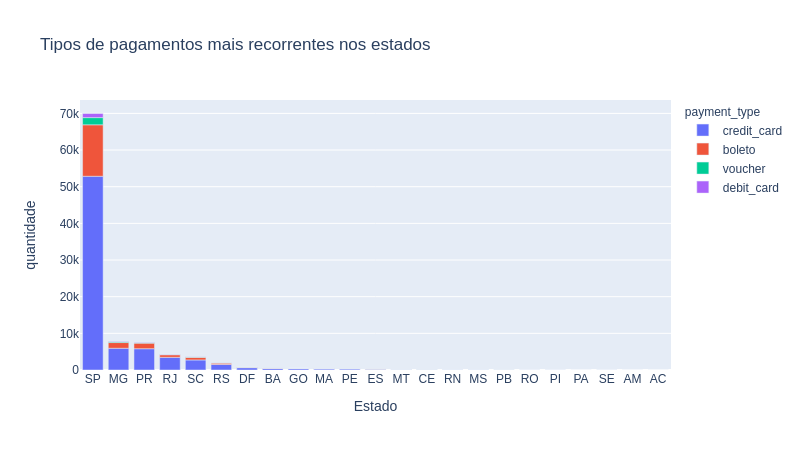

In [77]:
fig = px.bar(df_res.sort_values(by=['quantidade', 'seller_state'], ascending=False), x = 'seller_state', y = 'quantidade', 
             title = 'Tipos de pagamentos mais recorrentes nos estados', 
             color = 'payment_type',
             labels={'seller_state':'Estado'})
gitly.show(fig)

In [78]:
estado = 'SP'
df1 = df_res[df_res.seller_state == estado].sort_values(by='quantidade', ascending = False)
print(f'Total de compras de vendedores de {estado}: {df1.quantidade.sum()}')
df1

Total de compras de vendedores de SP: 69968


,seller_state,payment_type,quantidade
72,SP,credit_card,52852
71,SP,boleto,14037
74,SP,voucher,1957
73,SP,debit_card,1122


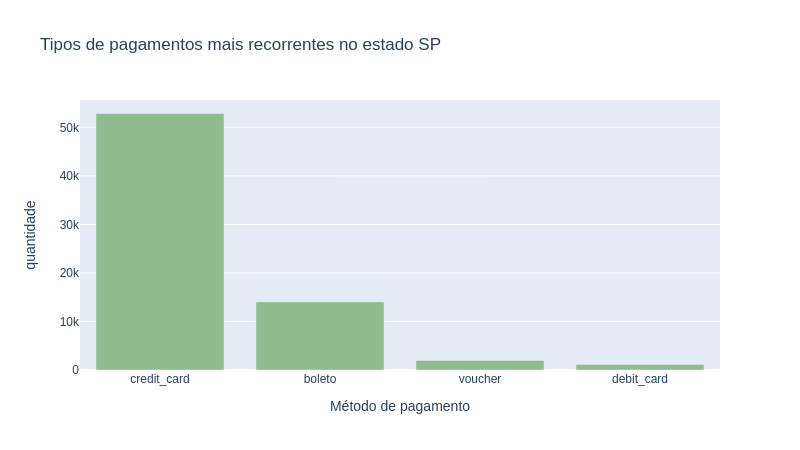

In [79]:
fig = px.bar(df1, x = 'payment_type', y = 'quantidade', title = 'Tipos de pagamentos mais recorrentes no estado '+ estado, 
             color_discrete_sequence =['darkseagreen']*len(df1),
             labels={'payment_type':'Método de pagamento'})
gitly.show(fig)

Com os gráficos é possível verificar quais as formas de pagamento mais recorrentes em cada estado do vendedor, em todos os casos o cartão de crédito é o mais utilizado. Vale notar também a enorme diferença na quantidade de compras realizadas em vendedores de São Paulo e no resto do país.

# Análise 4 - 5 categorias mais bem avaliadas pelos consumidores.


## Tratamento dos dados

### Join das tabelas

In [80]:
df_compra_itens.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9


In [81]:
df_compra_itens.agg(['nunique', 'size', 'count'])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
nunique,98666,21,32951,3095,93318,5968,6999,8050
size,112650,112650,112650,112650,112650,112650,112650,112650
count,112650,112650,112650,112650,112650,112650,112650,112650


In [82]:
df_left = df_compra_itens[['product_id', 'order_id']]
df_left.head(2)

,product_id,order_id
0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214
1,e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3


In [83]:
df_produtos.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [84]:
df_produtos.agg(['nunique', 'size', 'count'])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
size,32951,32951,32951,32951,32951,32951,32951,32951,32951
count,32951,32341,32341,32341,32341,32949,32949,32949,32949


In [85]:
df_right = df_produtos[['product_id', 'product_category_name']]
df_right.head(2)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes


In [86]:
df_produtos_compra_itens = df_left.merge(df_right, how='left', on='product_id')
df_produtos_compra_itens.head(2)

,product_id,order_id,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,pet_shop


In [87]:
df_produtos_compra_itens.shape

(112650, 3)

In [88]:
df_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [89]:
df_right = df_reviews[['order_id', 'review_score']]
df_right.head(2)

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5


In [90]:
df_produtos_compra_itens_reviews = df_produtos_compra_itens.merge(df_right, how='left', on='order_id')
df_produtos_compra_itens_reviews.head(2)

,product_id,order_id,product_category_name,review_score
0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,5
1,e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,pet_shop,4


In [91]:
df_produtos_compra_itens_reviews.shape

(113322, 4)

In [92]:
df_produtos_compra_itens_reviews.agg(['nunique', 'size', 'count'])

,product_id,order_id,product_category_name,review_score
nunique,32951,98666,73,5
size,113322,113322,113322,113322
count,113322,113322,111710,113322


### Removendo order_id repetidos

In [93]:
df_produtos_compra_itens_reviews.drop_duplicates(subset=['order_id'], inplace = True)
df_produtos_compra_itens_reviews.shape

(98666, 4)

## Análise descritiva 

In [94]:
df_res = df_produtos_compra_itens_reviews[['product_category_name', 'review_score']].groupby(by='product_category_name').mean()
df_res = df_res.sort_values(by = 'review_score',ascending = False)
df_res.head(5)

,review_score
product_category_name,
cds_dvds_musicais,4.666667
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.459725
fashion_esporte,4.400000
livros_importados,4.384615


In [95]:
cat = 'fashion_roupa_infanto_juvenil'
df = df_produtos_compra_itens_reviews[['product_category_name', 'review_score']].value_counts().reset_index().rename(columns={0:'quantidade'})
df[df.product_category_name == cat]

,product_category_name,review_score,quantidade
272,fashion_roupa_infanto_juvenil,5,7
344,fashion_roupa_infanto_juvenil,1,1


In [96]:
cat = 'livros_interesse_geral'
df = df_produtos_compra_itens_reviews[['product_category_name', 'review_score']].value_counts().reset_index().rename(columns={0:'quantidade'})
df[df.product_category_name == cat]

,product_category_name,review_score,quantidade
61,livros_interesse_geral,5,371
132,livros_interesse_geral,4,79
179,livros_interesse_geral,1,36
229,livros_interesse_geral,3,17
282,livros_interesse_geral,2,6


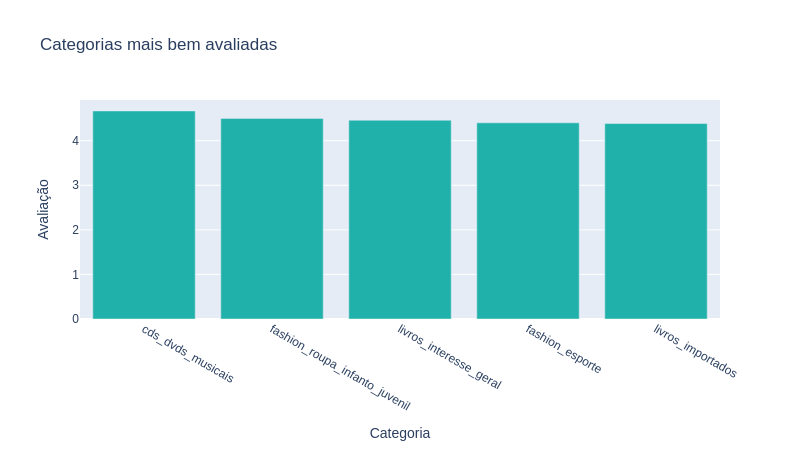

In [97]:
fig = px.bar(df_res.head(5), y = 'review_score', title='Categorias mais bem avaliadas', 
             labels={'review_score':'Avaliação','product_category_name':'Categoria'},
             color_discrete_sequence =['lightseagreen']*5)
gitly.show(fig)

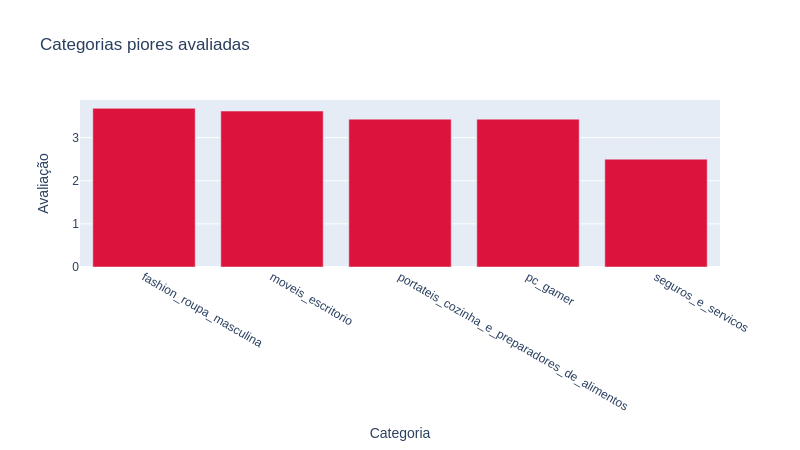

In [98]:
fig = px.bar(df_res.tail(5), y = 'review_score', title='Categorias piores avaliadas', 
             labels={'review_score':'Avaliação','product_category_name':'Categoria'},
             color_discrete_sequence =['crimson']*5)
gitly.show(fig)

Entre as categorias com maior avaliação somente a fashion_roupa_infanto_juvenil tem menos de 10 avaliações de clientes, mas mesmo assim, possui 7 com nota 5, destaca-se também a categoria de livros, tendo interesse geral muito bem avaliada e por um número bem expressivo de pessos e os importados que fecha o Top 5.

# Conclusão

A parte de visualização do Power BI acho que é melhor e mais simples que a do python, basta arrastar e escolher o que quer mostrar. Já na parte de manipulação dos dados acho mais fácil com o pandas, pode ser também por estar conhecendo o BI agora e não ter tanta familiaridade ainda com a ferramenta.

Algumas análises até deram um pouco diferente comparando ambos, como a de categoria melhor avaliada, lá no BI ele utilizou as 100 mil notas dos usuários e em python com mais ou menos 99 mil, porque foi baseado no número de pedidos.